# Sentiment Classification


### Generate Word Embeddings and retrieve outputs of each layer with Keras based on Classification task

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

It is a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We willl use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). 



### Dataset

`from keras.datasets import imdb`

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


### Aim

1. Import test and train data  
2. Import the labels ( train and test) 
3. Get the word index and then Create key value pair for word and word_id. (12.5 points)
4. Build a Sequential Model using Keras for Sentiment Classification task. (10 points)
5. Report the Accuracy of the model. (5 points)  
6. Retrive the output of each layer in keras for a given single test sample from the trained model you built. (2.5 points)


#### Usage:

In [0]:
import numpy as np
from keras.datasets import imdb

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

# restore np.load for future normal usage
np.load = np_load_old

In [0]:
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [12]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


In [13]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
9998


Review length: 
Mean 234.76 words (172.911495)


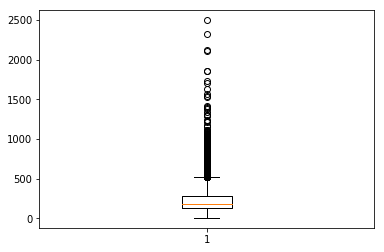

In [14]:
# Summarize review length
from matplotlib import pyplot
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

In [0]:
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

vocab_size = 10000 #vocab size

#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [20]:
# key value pair for word and word_id
INDEX_FROM=0   # word index offset
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
# word_to_id["<PAD>"] = 0
# word_to_id["<START>"] = 1
# word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(id_to_word[0])
# print(' '.join(id_to_word[id] for id in x_train[0] ))

1654784/1641221 [==============================] - 1s 1us/step


KeyError: ignored

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [22]:
# create the model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

W0728 17:16:54.045618 139809411356544 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 17:16:54.087809 139809411356544 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 17:16:54.095698 139809411356544 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 17:16:54.139760 139809411356544 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 17:16:54.158655 139809411356544 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2400250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,720,501
Trainable params: 2,720,501
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

W0728 17:17:08.370009 139809411356544 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 5s - loss: 0.4508 - acc: 0.7616 - val_loss: 0.2966 - val_acc: 0.8716
Epoch 2/10
 - 1s - loss: 0.1330 - acc: 0.9530 - val_loss: 0.3375 - val_acc: 0.8637
Epoch 3/10
 - 1s - loss: 0.0228 - acc: 0.9955 - val_loss: 0.4377 - val_acc: 0.8629
Epoch 4/10
 - 1s - loss: 0.0029 - acc: 0.9999 - val_loss: 0.4838 - val_acc: 0.8647
Epoch 5/10
 - 1s - loss: 9.9365e-04 - acc: 1.0000 - val_loss: 0.5102 - val_acc: 0.8656
Epoch 6/10
 - 1s - loss: 5.5479e-04 - acc: 1.0000 - val_loss: 0.5310 - val_acc: 0.8663
Epoch 7/10
 - 1s - loss: 3.6237e-04 - acc: 1.0000 - val_loss: 0.5483 - val_acc: 0.8665
Epoch 8/10
 - 1s - loss: 2.5784e-04 - acc: 1.0000 - val_loss: 0.5634 - val_acc: 0.8672
Epoch 9/10
 - 1s - loss: 1.9232e-04 - acc: 1.0000 - val_loss: 0.5769 - val_acc: 0.8669
Epoch 10/10
 - 1s - loss: 1.4798e-04 - acc: 1.0000 - val_loss: 0.5891 - val_acc: 0.8671
Accuracy: 86.71%


## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [24]:
#output of each layer in keras for a given single test sample from the trained model you built

#output 1st test input
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
layer_outs = functor([x_test[0:1], 1.])
print layer_outs

[array([[[ 0.00399897,  0.00928004, -0.00539494, ..., -0.00369706,
         -0.00754519, -0.01427043],
        [ 0.00399897,  0.00928004, -0.00539494, ..., -0.00369706,
         -0.00754519, -0.01427043],
        [ 0.00399897,  0.00928004, -0.00539494, ..., -0.00369706,
         -0.00754519, -0.01427043],
        ...,
        [ 0.04108026, -0.00830565, -0.0394357 , ...,  0.01502962,
          0.01348254, -0.04305512],
        [ 0.04625212,  0.00934713, -0.03547856, ...,  0.01545973,
          0.00219694, -0.0221229 ],
        [ 0.00179564, -0.03668812,  0.05982541, ..., -0.03496486,
         -0.0194705 , -0.04267405]]], dtype=float32), array([[ 0.00399897,  0.00928004, -0.00539494, ..., -0.03496486,
        -0.0194705 , -0.04267405]], dtype=float32), array([[0.41149628, 0.42018658, 0.14357457, 0.40636268, 0.38783616,
        0.44689465, 0.50054073, 0.17286317, 0.4111919 , 0.5005228 ,
        0.18867555, 0.40538773, 0.11361304, 0.15637746, 0.12467961,
        0.44135988, 0.4001837 , 0.1

In [25]:
y_test[0]

0

**Each layer output has been printed above. Also looking at the last layer output we can see above the predicted output and the actual matches 0 which means the word is negative. Lets test with one more word.**



In [26]:
# Testing
layer_outs = functor([x_test[1:2], 1.])
print layer_outs

[array([[[ 0.00399897,  0.00928004, -0.00539494, ..., -0.00369706,
         -0.00754519, -0.01427043],
        [ 0.00399897,  0.00928004, -0.00539494, ..., -0.00369706,
         -0.00754519, -0.01427043],
        [ 0.00399897,  0.00928004, -0.00539494, ..., -0.00369706,
         -0.00754519, -0.01427043],
        ...,
        [-0.04895012, -0.03692472, -0.03840801, ...,  0.0248633 ,
         -0.02185734,  0.00838978],
        [-0.02859876, -0.00155839, -0.0101988 , ..., -0.05392627,
         -0.01987219,  0.00329912],
        [ 0.07098588, -0.04242374, -0.00329667, ..., -0.05647493,
          0.01985215,  0.0476546 ]]], dtype=float32), array([[ 0.00399897,  0.00928004, -0.00539494, ..., -0.05647493,
         0.01985215,  0.0476546 ]], dtype=float32), array([[0.0000000e+00, 0.0000000e+00, 7.1413249e-01, 0.0000000e+00,
        0.0000000e+00, 1.2124496e-01, 0.0000000e+00, 5.8118188e-01,
        0.0000000e+00, 0.0000000e+00, 7.9366362e-01, 0.0000000e+00,
        6.0219395e-01, 7.4278384e-0

In [27]:
y_test[1]

1

**As for the above text also the predicted is same as the actual output i.e "1". Now lets try to improve the accuracy by using below code.**

In [28]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 300
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

W0728 17:18:25.317281 139809411356544 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               1200250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 1,523,605
Trainable params: 1,523,605
Non-trainable params: 0
_________________________________________________________________
